In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

In [2]:
from IPython.display import display, IFrame

def merging_animation():
    src="https://docs.google.com/presentation/d/e/2PACX-1vSk2FfJ4K_An_CQwcN_Yu5unpJckOZjVQDFqZ78ZTTMmowUsCQKKVnum0_m6TaiGquQ44E3FiS9g2Y4/embed?start=false&loop=false&delayms=60000"
    width=825
    height=500
    display(IFrame(src, width, height))

# Lecture 10 – Grouping with Subgroups, Merge

## DSC 10, Summer 2022

### Announcements

- Good job so far on the assignments!
    - Having trouble turning in assignments on time? Talk to a staff member during OH or via email!
- Homework 3 is due **Sat at 11:59pm.**
- Lab 4 is due **Tues 4/26 at 11:59pm**.
- Midterm Project will be released later this week and will be due **Sat 8/6 at 11:59pm**.
    - Can work alone or with a partner.
    - Will make a spreadsheet to help people find partners.
- Will try something different today:
    - Open-ended coding questions instead of MC Menti Qs, will walk around to help.

### Agenda

- Grouping with subgroups.
- Merging.

## Grouping with subgroups

### Our familiar NBA dataset 🏀

In [3]:
nba = bpd.read_csv('data/nba-2022.csv')
nba

,Player,Position,Team,Salary
0,John Collins,PF,Atlanta Hawks,23000000
1,Danilo Gallinari,PF,Atlanta Hawks,20475000
2,Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...,...
378,Raul Neto,PG,Washington Wizards,2089448
379,Daniel Gafford,C,Washington Wizards,1782621
380,Anthony Gill,PF,Washington Wizards,1517981


### How many players are on each team?

- We know how to answer this: `.groupby('Team')` with `.count()`.
- **Notice**: `'Team'` becomes the index.

In [4]:
nba.groupby('Team').count()

,Player,Position,Salary
Team,,,
Atlanta Hawks,11,11,11
Boston Celtics,13,13,13
Brooklyn Nets,11,11,11
...,...,...,...
Toronto Raptors,11,11,11
Utah Jazz,11,11,11
Washington Wizards,12,12,12


### How many players at each position does each team have?

- It seems like grouping would be helpful here, but currently we only know how to group by a single column.
    - Right now, we can count the number of players on each team.
    - Separately, we can count the number of players at each position.

- Here, we want to somehow group by multiple columns. 
    - Specifically, we want the number of players at each position on each team.
    - e.g. the number of centers on the Los Angeles Lakers, the number of power forwards on the Atlanta Hawks.
- There's a way!

In [5]:
%%pt

# Take the top 24 rows for simplicity
nba.take(np.arange(24)).groupby(['Team', 'Position']).count()

### `.groupby` with subgroups

- To make groups within groups, pass a **list** of column names to `.groupby`:

```py
df.groupby([col_1, col_2, ..., col_k])
```
- Group by `col_1` first.
- Within each group, group by `col_2`, and so on.
- The resulting DataFrame has one row per unique combination of entries in the specified columns.

### Notice the index... 🤔

- This is called a "[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)".
    - The DataFrame is indexed by `'Team'` **and** `'Position'`.
- We won't worry about the details of MultiIndexes.
- We can use `.reset_index()` to "flatten" our DataFrame back to normal.

In [6]:
nba.groupby(['Team', 'Position']).count().reset_index()

,Team,Position,Player,Salary
0,Atlanta Hawks,C,2,2
1,Atlanta Hawks,PF,2,2
2,Atlanta Hawks,PG,2,2
...,...,...,...,...
144,Washington Wizards,PG,3,3
145,Washington Wizards,SF,2,2
146,Washington Wizards,SG,2,2


### Does order matter?

In [7]:
nba.groupby(['Position', 'Team']).count()

Player  Salary
Position Team                              
C        Atlanta Hawks            2       2
         Boston Celtics           3       3
         Brooklyn Nets            2       2
...                             ...     ...
SG       Toronto Raptors          1       1
         Utah Jazz                3       3
         Washington Wizards       2       2

[147 rows x 2 columns]

**Answer:** Kind of. The order of the indices will be different, but the resulting DataFrame will contain the same information.

### You try: Which team has the most centers?

In [8]:
position_counts = nba.groupby(['Team', 'Position']).count().reset_index()
position_counts

,Team,Position,Player,Salary
0,Atlanta Hawks,C,2,2
1,Atlanta Hawks,PF,2,2
2,Atlanta Hawks,PG,2,2
...,...,...,...,...
144,Washington Wizards,PG,3,3
145,Washington Wizards,SF,2,2
146,Washington Wizards,SG,2,2


In [9]:
(position_counts
 [position_counts.get('Position') == 'C'] 
 .sort_values('Salary', ascending=False)
)

,Team,Position,Player,Salary
122,Sacramento Kings,C,4,4
29,Dallas Mavericks,C,4,4
102,Orlando Magic,C,4,4
...,...,...,...,...
10,Brooklyn Nets,C,2,2
142,Washington Wizards,C,2,2
25,Cleveland Cavaliers,C,1,1


In this case, we could've done this without subgroups, too:

In [10]:
(nba
 [nba.get('Position') == 'C']
 .groupby('Team')
 .count()
 .sort_values('Position', ascending=False)
)

,Player,Position,Salary
Team,,,
Sacramento Kings,4,4,4
Dallas Mavericks,4,4,4
Orlando Magic,4,4,4
...,...,...,...
Brooklyn Nets,2,2,2
Washington Wizards,2,2,2
Cleveland Cavaliers,1,1,1


### Other aggregation methods work, too!

In [11]:
nba.groupby(['Team', 'Position']).max()

Player    Salary
Team               Position                                    
Atlanta Hawks      C                     Gorgui Dieng  17103448
                   PF                    John Collins  23000000
                   PG                      Trae Young   8326471
...                                               ...       ...
Washington Wizards PG               Spencer Dinwiddie  17142857
                   SF                     Deni Avdija   4692840
                   SG        Kentavious Caldwell-Pope  34502130

[147 rows x 2 columns]

- Remember, the aggregation method is applied to each column individually.
- For instance, Gorgui Dieng does not make a salary of 17,103,448 – his name is just the last (`max`) name alphabetically amongst all centers on the Atlanta Hawks.

In [12]:
nba[(nba.get('Team') == 'Atlanta Hawks') & (nba.get('Position') == 'C')]

,Player,Position,Team,Salary
3,Clint Capela,C,Atlanta Hawks,17103448
9,Gorgui Dieng,C,Atlanta Hawks,4000000


### Example: Sea temperatures 🌊

This dataset contains the sea surface temperature in La Jolla, on many days ranging from August 22, 1916 to May 31, 2019.

In [13]:
sea_temp = bpd.read_csv('data/sea_temp.csv')
sea_temp

,YEAR,MONTH,DAY,SURFACE_TEMP
0,1916,8,22,19.5
1,1916,8,23,19.9
2,1916,8,24,19.7
...,...,...,...,...
36294,2019,5,28,17.1
36295,2019,5,29,18.1
36296,2019,5,31,18.3


<!--
<div class="menti">
<div>

### Discussion Question: Our dataset contains information on 1,234 different months. How do we find the month (e.g. November 1998) with the highest average temperature?

What kind of grouping should we do here?

- A) `sea_temp.groupby('SURFACE_TEMP').mean()`
- B) `sea_temp.groupby('MONTH').mean()`
- C) `sea_temp.groupby(['YEAR', 'MONTH']).mean()`
- D) `sea_temp.groupby(['MONTH', 'DAY']).mean()`
- E) `sea_temp.groupby(['MONTH', 'SURFACE_TEMP']).mean()`
    
</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>
-->

### You try: Our dataset contains information on 1,234 different months. How do we find the month (e.g. November 1998) with the highest average temperature?


### Plot of monthly average surface temperature 📈

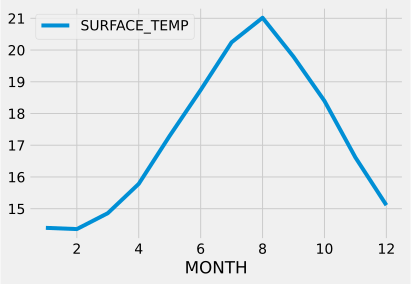

In [14]:
(sea_temp
 .groupby('MONTH') 
 .mean() 
 .plot(kind='line', y='SURFACE_TEMP')
);

### Summary: `.groupby` with subgroups

- Pass a list of columns to `.groupby` to make subgroups.
- **Always** use `.reset_index()` after grouping with subgroups, to move the MultiIndex back to the columns.

## Merging 🚗

In [15]:
phones = bpd.DataFrame().assign(
    Model=['iPhone 13', 'iPhone 13 Pro Max', 'Samsung Galaxy Z Flip', 'Pixel 5a'],
    Price=[799, 1099, 999, 449],
    Screen=[6.1, 6.7, 6.7, 6.3]
)

inventory = bpd.DataFrame().assign(
    Handset=['iPhone 13 Pro Max', 'iPhone 13', 'Pixel 5a', 'iPhone 13'],
    Units=[50, 40, 10, 100],
    Store=['Westfield UTC', 'Westfield UTC', 'Fashion Valley', 'Downtown']
)

In [16]:
# Phones on the market right now
phones

,Model,Price,Screen
0,iPhone 13,799,6.1
1,iPhone 13 Pro Max,1099,6.7
2,Samsung Galaxy Z Flip,999,6.7
3,Pixel 5a,449,6.3


In [17]:
# Which phones my stores have in stock in the area
inventory

,Handset,Units,Store
0,iPhone 13 Pro Max,50,Westfield UTC
1,iPhone 13,40,Westfield UTC
2,Pixel 5a,10,Fashion Valley
3,iPhone 13,100,Downtown


**Question:** If I sell all of the phones in my inventory, how much will I make in revenue?

### If I sell all of the phones in my inventory, how much will I make in revenue?

In [18]:
%%pt

phones.merge(inventory, left_on='Model', right_on='Handset')

### What just happened!? 🤯

In [19]:
# Click through the presentation that appears
merging_animation()

### `.merge`

- Pick a "left" and "right" DataFrame.
- Choose a column from each to "merge on".
```python
left_df.merge(
    right_df, 
    left_on=left_column_name,
    right_on=right_column_name
)
```
- `left_on` and `right_on` should be column names (they don't have to be the same).
- The resulting DataFrame contains a single row for every match between the two columns.
- Rows in either DataFrame without a match disappear!

### If I sell all of the phones in my inventory, how much will I make in revenue?

In [20]:
%%pt

# Notice there's no Samsung Galaxy Z Flip in phones_merged
phones_merged = phones.merge(inventory, left_on='Model', right_on='Handset')

In [21]:
(phones_merged.get('Price') * phones_merged.get('Units')).sum()

171300

### Shortcut if column names are the same: `on`

In [22]:
inventory_relabeled = inventory.assign(Model=inventory.get('Handset')).drop(columns=['Handset'])
inventory_relabeled

,Units,Store,Model
0,50,Westfield UTC,iPhone 13 Pro Max
1,40,Westfield UTC,iPhone 13
2,10,Fashion Valley,Pixel 5a
3,100,Downtown,iPhone 13


In [23]:
%%pt

phones.merge(inventory_relabeled, on='Model')

**Notice**: There's only one column containing phone names now.

### Does order matter? 🤔

In [24]:
%%pt

inventory.merge(phones, left_on='Handset', right_on='Model')

**Answer:** The order of the rows and columns will be different, but the content will be the same.

### What if we want to "merge on" an index?

Instead of using `left_on` or `right_on`, use `left_index=True` or `right_index=True`.

In [25]:
phones

,Model,Price,Screen
0,iPhone 13,799,6.1
1,iPhone 13 Pro Max,1099,6.7
2,Samsung Galaxy Z Flip,999,6.7
3,Pixel 5a,449,6.3


In [26]:
inventory_by_handset = inventory.set_index('Handset')
inventory_by_handset

,Units,Store
Handset,,
iPhone 13 Pro Max,50,Westfield UTC
iPhone 13,40,Westfield UTC
Pixel 5a,10,Fashion Valley
iPhone 13,100,Downtown


In [27]:
%%pt

phones.merge(inventory_by_handset, left_on='Model', right_index=True)

### Discussion Question Setup

In [28]:
nice_weather_cities = bpd.DataFrame().assign(
    city=['La Jolla', 'San Diego', 'Austin', 'Los Angeles'],
    state=['California', 'California', 'Texas', 'California'],
    today_high_temp=['79', '83', '87', '87']
    
)

schools = bpd.DataFrame().assign(
    name=['UCSD', 'University of Chicago', 'University of San Diego','Johns Hopkins University', 'UT Austin', 'SDSU', 'UCLA'], 
    city=['La Jolla', 'Chicago', 'San Diego', 'Baltimore', 'Austin', 'San Diego', 'Los Angeles'],
    state=['California', 'Illinois', 'California', 'Maryland', 'Texas', 'California', 'California'],
    graduation_rate=[0.87, 0.94, 0.78, 0.92, 0.81, 0.83, 0.91 ]
)

### Discussion Question

In [29]:
nice_weather_cities

,city,state,today_high_temp
0,La Jolla,California,79
1,San Diego,California,83
2,Austin,Texas,87
3,Los Angeles,California,87


In [30]:
schools

,name,city,state,graduation_rate
0,UCSD,La Jolla,California,0.87
1,University of Chicago,Chicago,Illinois,0.94
2,University of San Diego,San Diego,California,0.78
3,Johns Hopkins University,Baltimore,Maryland,0.92
4,UT Austin,Austin,Texas,0.81
5,SDSU,San Diego,California,0.83
6,UCLA,Los Angeles,California,0.91


### No code: how many rows in `nice_weather_cities.merge(schools, on='city')`?

<!--
**How many rows will be in the output of `nice_weather_cities.merge(schools, on='city')`?**

<center>
<pre>
A. 4      B. 5      C. 6       D. 7       E. 8
</pre>
</center>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386.
-->

### Followup: How many rows in `nice_weather_cities.merge(schools, on='state')`?

(It's more than you might guess at first!)

In [31]:
nice_weather_cities.merge(schools, on='state')

,city_x,state,today_high_temp,name,city_y,graduation_rate
0,La Jolla,California,79,UCSD,La Jolla,0.87
1,La Jolla,California,79,University of San Diego,San Diego,0.78
2,La Jolla,California,79,SDSU,San Diego,0.83
...,...,...,...,...,...,...
10,Los Angeles,California,87,SDSU,San Diego,0.83
11,Los Angeles,California,87,UCLA,Los Angeles,0.91
12,Austin,Texas,87,UT Austin,Austin,0.81


In [32]:
%%pt

# Why?

nice_weather_cities.merge(schools, on='state')

## Summary

### Summary

- To create groups within a group, pass a list to `.groupby`.
    - The result has one row for every unique combination of elements in the specified columns.
- To combine information from multiple DataFrames, use `.merge`.
    - When using `.merge`, Python searches for a match between a specified column in each DataFrame and combines the rows with a match.
    - No matches = row disappears!
- **Next time**: if-statements and loops.